In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix 
import warnings 
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('C:\\Users\\Administrator\\Downloads\\bank_notes.csv', header=None)

In [5]:
data.head()

,0,1,2,3,4
0,variance,skewness,curtosis,entropy,Target
1,3.6216,8.6661,-2.8073,-0.44699,0
2,4.5459,8.1674,-2.4586,-1.4621,0
3,3.866,-2.6383,1.9242,0.10645,0
4,3.4566,9.5228,-4.0112,-3.5944,0


In [6]:
data.tail()

,0,1,2,3,4
1368,0.40614,1.3492,-1.4501,-0.55949,1
1369,-1.3887,-4.8773,6.4774,0.34179,1
1370,-3.7503,-13.4586,17.5932,-2.7771,1
1371,-3.5637,-8.3827,12.393,-1.2823,1
1372,-2.5419,-0.65804,2.6842,1.1952,1


In [8]:
data.shape

(1373, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1373 entries, 0 to 1372
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1373 non-null   object
 1   1       1373 non-null   object
 2   2       1373 non-null   object
 3   3       1373 non-null   object
 4   4       1373 non-null   object
dtypes: object(5)
memory usage: 53.8+ KB


In [10]:
data.describe()

,0,1,2,3,4
count,1373,1373,1373,1373,1373
unique,1339,1257,1271,1157,3
top,0.5706,-4.4552,4.5718,-0.9888,0
freq,5,6,5,5,762


In [11]:
data.columns = ['var', 'skew', 'kurt', 'entr', 'auth']

In [12]:
print(data.head())

        var      skew      kurt      entr    auth
0  variance  skewness  curtosis   entropy  Target
1    3.6216    8.6661   -2.8073  -0.44699       0
2    4.5459    8.1674   -2.4586   -1.4621       0
3     3.866   -2.6383    1.9242   0.10645       0
4    3.4566    9.5228   -4.0112   -3.5944       0


In [13]:
data = data.iloc[1:,:]

In [14]:
data.isnull().sum()

var     0
skew    0
kurt    0
entr    0
auth    0
dtype: int64

In [15]:
print(data.info)

<bound method DataFrame.info of           var      skew     kurt      entr auth
1      3.6216    8.6661  -2.8073  -0.44699    0
2      4.5459    8.1674  -2.4586   -1.4621    0
3       3.866   -2.6383   1.9242   0.10645    0
4      3.4566    9.5228  -4.0112   -3.5944    0
5     0.32924   -4.4552   4.5718   -0.9888    0
...       ...       ...      ...       ...  ...
1368  0.40614    1.3492  -1.4501  -0.55949    1
1369  -1.3887   -4.8773   6.4774   0.34179    1
1370  -3.7503  -13.4586  17.5932   -2.7771    1
1371  -3.5637   -8.3827   12.393   -1.2823    1
1372  -2.5419  -0.65804   2.6842    1.1952    1

[1372 rows x 5 columns]>


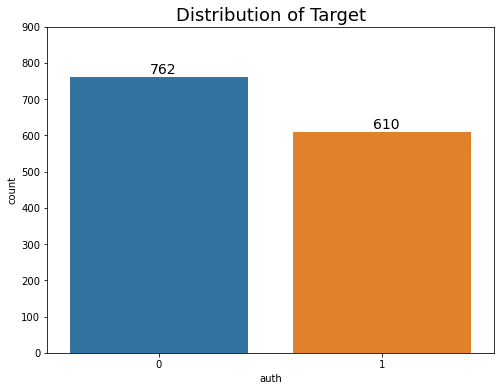

In [32]:
plt.figure(figsize=(8,6)) 
plt.title('Distribution of Target', size=18) 
sns.countplot(x=data['auth']) 
target_count = data.auth.value_counts() 
plt.annotate(s=target_count[0], xy=(-0.04,10+target_count[0]), size=14) 
plt.annotate(s=target_count[1], xy=(0.96,10+target_count[1]), size=14) 
plt.ylim(0,900) 
plt.show()


In [34]:
nb_to_delete = target_count[0] - target_count[1]
data = data.sample(frac=1, random_state=42).sort_values(by='auth')
data = data[nb_to_delete:]
print(data['auth'].value_counts())

0    610
1    610
Name: auth, dtype: int64


In [36]:
x = data.loc[:, data.columns != 'auth'] 
y = data.loc[:, data.columns == 'auth'] 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) 

In [37]:
scalar = StandardScaler() 
scalar.fit(x_train) 
x_train = scalar.transform(x_train) 
x_test = scalar.transform(x_test)

In [41]:
clf=LogisticRegression(solver='lbfgs', random_state=42,multi_class='auto')
clf.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42)

In [42]:
y_pred = np.array(clf.predict(x_test)) 
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_pred), 
columns=["Pred.Negative", "Pred.Positive"], 
index=['Act.Negative', "Act.Positive"]) 
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel() 
accuracy = round((tn+tp)/(tn+fp+fn+tp), 4) 
print(conf_mat) 
print(f'\n Accuracy = {round(100*accuracy, 2)}%')

              Pred.Negative  Pred.Positive
Act.Negative            187              6
Act.Positive              0            173

 Accuracy = 98.36%
